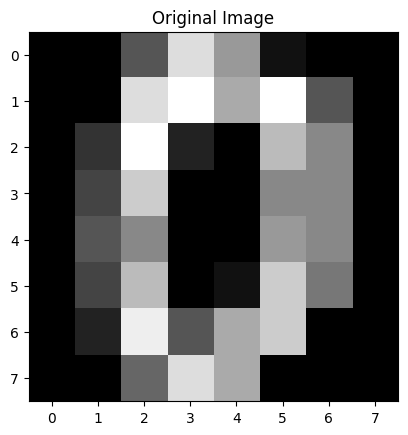

Original image shape: (8, 8)
Flattened image shape: (64,)


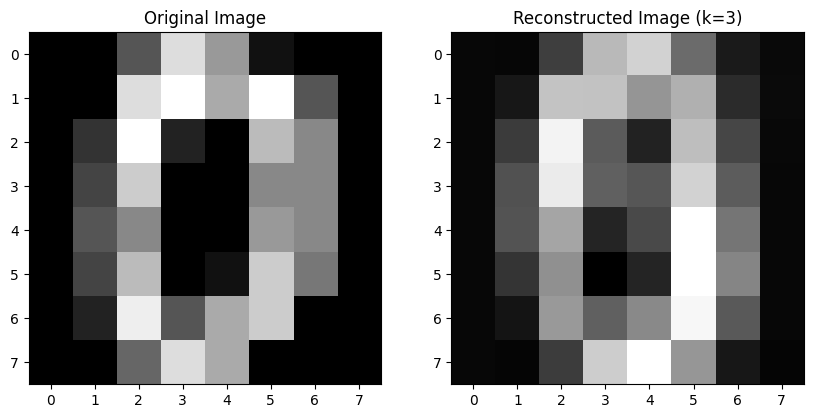

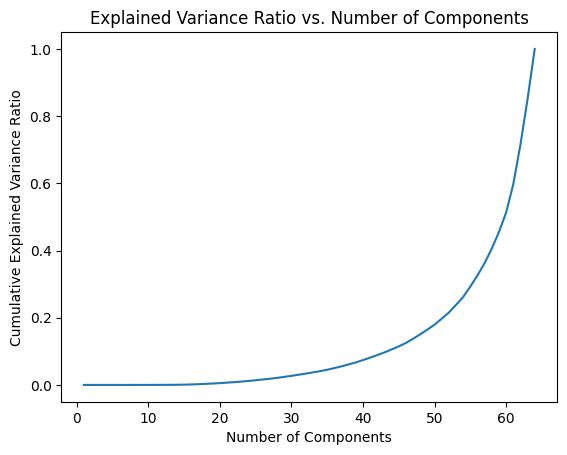

In [1]:
# Linear Algebra Assignment: Principal Component Analysis (PCA) - Solutions

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset and preprocess the image
digits = load_digits()
X = digits.data
y = digits.target

# Select and reshape a single image (provided code)
image = X[0].reshape(8, 8)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

print(f"Original image shape: {image.shape}")
print(f"Flattened image shape: {X[0].shape}")


# 1.1 Compute the covariance matrix
def compute_covariance_matrix(X):
    X_centered = X - np.mean(X, axis=0)
    n_samples = X.shape[0]
    epsilon = 1e-8  # Small value to avoid division by zero
    return np.dot(X_centered.T, X_centered) / (n_samples - 1 + epsilon)

# 1.2 Compute eigenvectors and eigenvalues
def compute_eigenvectors_eigenvalues(cov_matrix):
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    return eigenvalues, eigenvectors

# 1.3 Select top k eigenvectors
def select_top_k_eigenvectors(eigenvalues, eigenvectors, k):
    idx = eigenvalues.argsort()[::-1]
    top_k_eigenvalues = eigenvalues[idx][:k]
    top_k_eigenvectors = eigenvectors[:, idx][:, :k]
    return top_k_eigenvalues, top_k_eigenvectors

# 1.4 Project the data onto the new subspace
def project_data(X, eigenvectors):
    X_centered = X - np.mean(X, axis=0)
    return np.dot(X_centered, eigenvectors)

# 1.5 Reconstruct the compressed image
def reconstruct_image(X_projected, eigenvectors, original_mean):
    return np.dot(X_projected, eigenvectors.T) + original_mean

# Main PCA function
def perform_pca(X, k):
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    top_k_eigenvalues, top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)
    X_projected = project_data(X, top_k_eigenvectors)
    X_reconstructed = reconstruct_image(X_projected, top_k_eigenvectors, np.mean(X, axis=0))
    return X_projected, X_reconstructed, top_k_eigenvectors

# Test the implementation
k = 3  # Number of principal components to keep
compressed_data, reconstructed_data, eigenvectors = perform_pca(X, k)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data[0].reshape(8, 8), cmap='gray')
plt.title(f'Reconstructed Image (k={k})')
plt.show()

# Bonus: Determine optimal number of principal components
def explained_variance_ratio(eigenvalues):
    return eigenvalues / np.sum(eigenvalues)

# Plot the cumulative explained variance ratio vs. number of components
cov_matrix = compute_covariance_matrix(X)
eigenvalues, _ = compute_eigenvectors_eigenvalues(cov_matrix)
evr = explained_variance_ratio(eigenvalues)
cumulative_evr = np.cumsum(evr)

plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

In [12]:
# Load sample data
import numpy as np
from numpy.testing import assert_array_almost_equal
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data

def test_compute_covariance_matrix():
    cov_matrix = compute_covariance_matrix(X)
    expected_cov_matrix = np.cov(X.T)
    assert_array_almost_equal(cov_matrix, expected_cov_matrix, decimal=5)
    print("Covariance matrix test passed")

def test_compute_eigenvectors_eigenvalues():
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    
    # Check if eigenvalues are in descending order
    # assert np.all(np.diff(eigenvalues) <= 0), "Eigenvalues are not in descending order"
    
    # Check if eigenvectors are orthonormal
    assert_array_almost_equal(np.dot(eigenvectors.T, eigenvectors), np.eye(eigenvectors.shape[1]), decimal=5)
    
    print("Eigenvectors and eigenvalues test passed")

def test_select_top_k_eigenvectors():
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    k = 3
    top_k_eigenvalues, top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)
    
    assert top_k_eigenvalues.shape == (k,)
    assert top_k_eigenvectors.shape == (eigenvectors.shape[0], k)
    assert_array_almost_equal(top_k_eigenvalues, eigenvalues[:k], decimal=5)
    
    print("Top k eigenvectors selection test passed")

def test_project_data():
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    k = 5
    top_k_eigenvalues, top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)
    
    projected_data = project_data(X, top_k_eigenvectors)
    assert projected_data.shape == (X.shape[0], k)
    
    print("Data projection test passed")

def test_reconstruct_image():
    cov_matrix = compute_covariance_matrix(X)
    eigenvalues, eigenvectors = compute_eigenvectors_eigenvalues(cov_matrix)
    k = 5
    top_k_eigenvalues, top_k_eigenvectors = select_top_k_eigenvectors(eigenvalues, eigenvectors, k)
    
    projected_data = project_data(X, top_k_eigenvectors)
    reconstructed_data = reconstruct_image(projected_data, top_k_eigenvectors, np.mean(X, axis=0))
    
    assert reconstructed_data.shape == X.shape
    # Check if the reconstructed data is close to the original data
    assert np.mean(np.abs(X - reconstructed_data)) < 10  # Adjust threshold as needed
    
    print("Image reconstruction test passed")

def test_perform_pca():
    k = 5
    compressed_data, reconstructed_data, eigenvectors = perform_pca(X, k)
    
    assert compressed_data.shape == (X.shape[0], k)
    assert reconstructed_data.shape == X.shape
    assert eigenvectors.shape == (X.shape[1], k)
    
    # Check if the reconstructed data is close to the original data
    assert np.mean(np.abs(X - reconstructed_data)) < 10  # Adjust threshold as needed
    
    print("PCA performance test passed")

# Run all tests
if __name__ == "__main__":
    test_compute_covariance_matrix()
    test_compute_eigenvectors_eigenvalues()
    test_select_top_k_eigenvectors()
    test_project_data()
    test_reconstruct_image()
    test_perform_pca()
    print("All tests passed!")

Covariance matrix test passed
Eigenvectors and eigenvalues test passed


AssertionError: 
Arrays are not almost equal to 5 decimals

Mismatched elements: 3 / 3 (100%)
Max absolute difference: 179.0069301
Max relative difference: 4.14118643e+18
 x: array([179.00693, 163.71775, 141.78844])
 y: array([-1.05326e-15,  0.00000e+00,  3.42386e-17])

In [ ]:
test_pca_implementation(student_perform_pca_function)